<a href="https://colab.research.google.com/github/shayanfarshid/bank-churn/blob/main/bank_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Bank Churn Prediction |
Shayan Farshid

In [ ]:
#Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import plotly.express as px

In [ ]:
df = pd.read_csv("Churn_Modelling.csv")

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Exploratory Data Analysis

In [ ]:
#check for missing values
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

Feature Engineering

In [ ]:
y = df["Exited"]

X = df.drop(["CustomerId", "Surname", "Exited"], axis=1)
#dropped columns CustomerId and Surname as they are not useful for prediction

Data Exploration

Text(0.5, 1.0, 'Correlation Matrix')

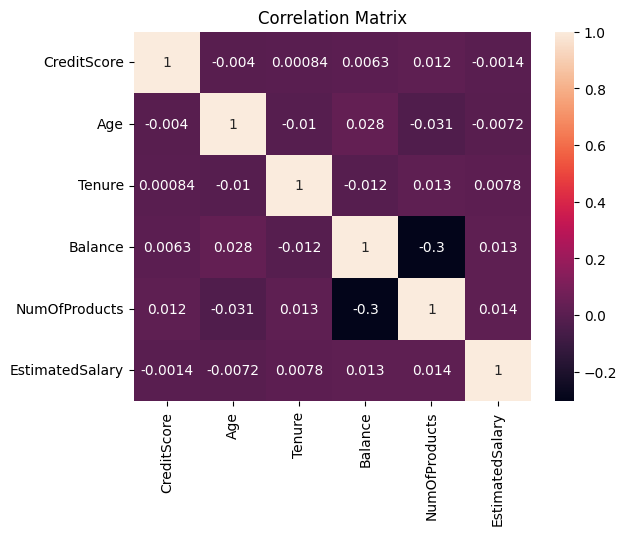

In [ ]:
numeric_cols = ["CreditScore", "Age", "Tenure", "Balance", "NumOfProducts", "EstimatedSalary"] #numeric columns

#correlation matrix
corr = X[numeric_cols].corr()
#sns.heatmap
sns.heatmap(corr, annot=True)
plt.title("Correlation Matrix")

/var/folders/jd/zlnvcczs037d7687c00jsd8r0000gn/T/ipykernel_68314/2971264951.py:3: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


/var/folders/jd/zlnvcczs037d7687c00jsd8r0000gn/T/ipykernel_68314/2971264951.py:4: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




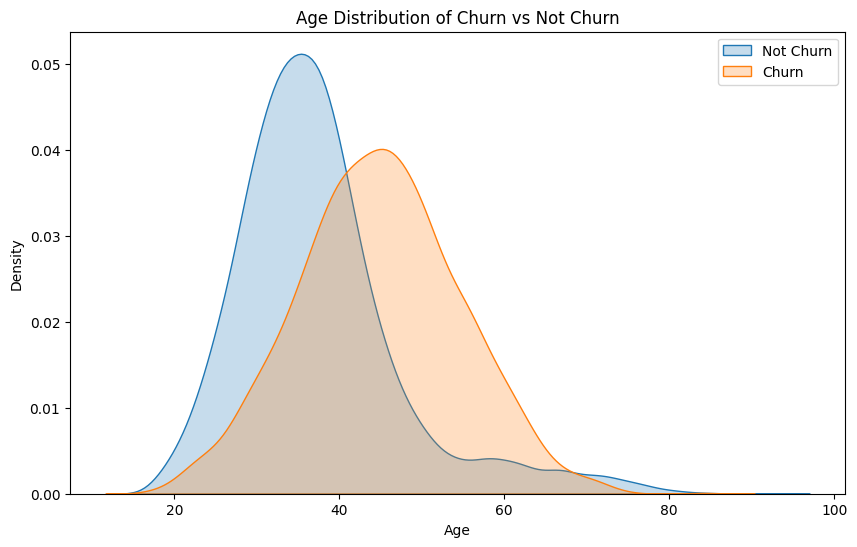

In [ ]:
#Age Distribution of churn vs not churn
plt.figure(figsize=(10, 6))
sns.kdeplot(df[df["Exited"] == 0]["Age"], label="Not Churn", shade=True)
sns.kdeplot(df[df["Exited"] == 1]["Age"], label="Churn", shade=True)
plt.xlabel("Age")
plt.ylabel("Density")
plt.title("Age Distribution of Churn vs Not Churn")
plt.legend()

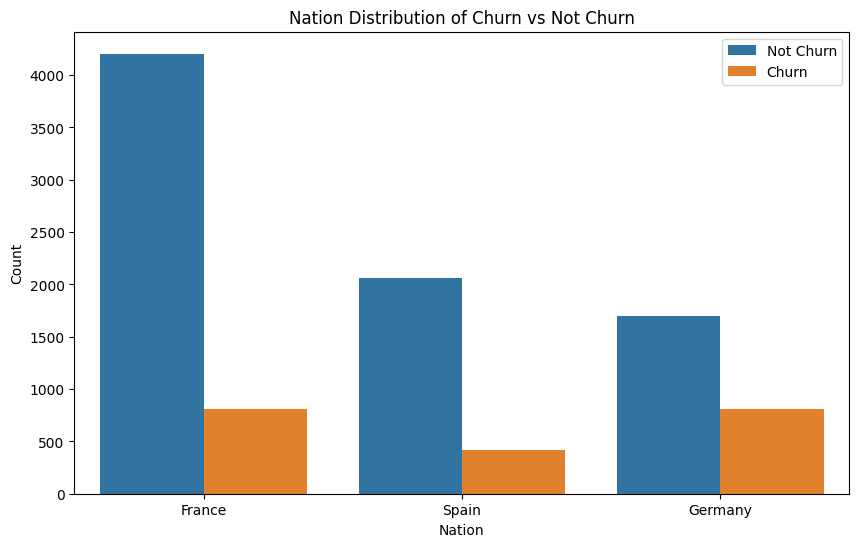

In [ ]:
#Nation Distribution of churn vs not churn
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="Geography", hue="Exited")
plt.title("Nation Distribution of Churn vs Not Churn")
plt.xlabel("Nation")
plt.ylabel("Count")
plt.legend(["Not Churn", "Churn"])

In [ ]:
dfx = pd.DataFrame({'count': [df[df['Exited'] == 0].shape[0], df[df['Exited'] == 1].shape[0]],
                   'churn': ['Not Churn', 'Churn']})

px.pie(dfx, values='count', names='churn', title='Churn Population', color_discrete_sequence=['#FFD700', '#FF4500'])

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'domain': {'x': [0.0, 1.0], 'y': [0.0, 1.0]},
              'hovertemplate': 'churn=%{label}<br>count=%{value}<extra></extra>',
              'labels': array(['Not Churn', 'Churn'], dtype=object),
              'legendgroup': '',
              'name': '',
              'showlegend': True,
              'type': 'pie',
              'values': array([7963, 2037])}],
    'layout': {'legend': {'tracegroupgap': 0},
               'piecolorway': [#FFD700, #FF4500],
               'template': '...',
               'title': {'text': 'Churn Population'}}
})

Modeling

In [ ]:
#Applying any three classification algorithms of choice (example LogisticRegression, SVM, RandomForest)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report, roc_auc_score

In [ ]:
X = pd.get_dummies(X, columns=['Geography','Gender'], drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Logistic Regression Accuracy:  0.812


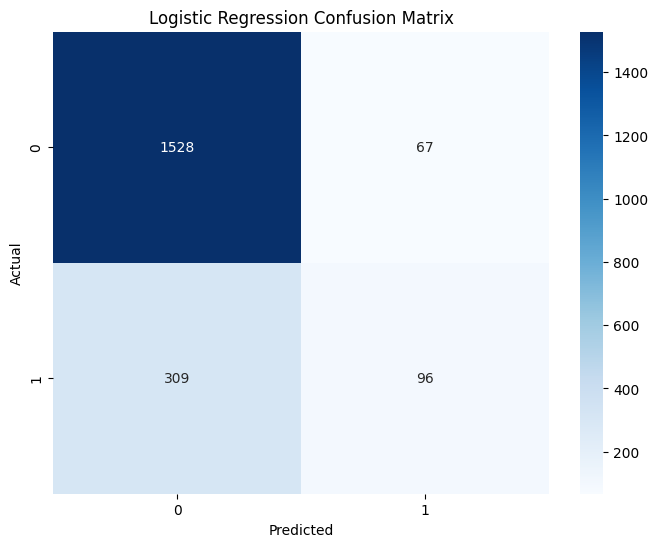

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1595
           1       0.59      0.24      0.34       405

    accuracy                           0.81      2000
   macro avg       0.71      0.60      0.61      2000
weighted avg       0.78      0.81      0.78      2000

ROC AUC:  0.5975153837222803


In [ ]:
#Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
log_reg_acc = accuracy_score(y_test, y_pred)
print("Logistic Regression Accuracy: ", log_reg_acc)

#Logistic Regression confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print(classification_report(y_test, y_pred))
print("ROC AUC: ", roc_auc_score(y_test, y_pred))

SVM Accuracy:  0.863


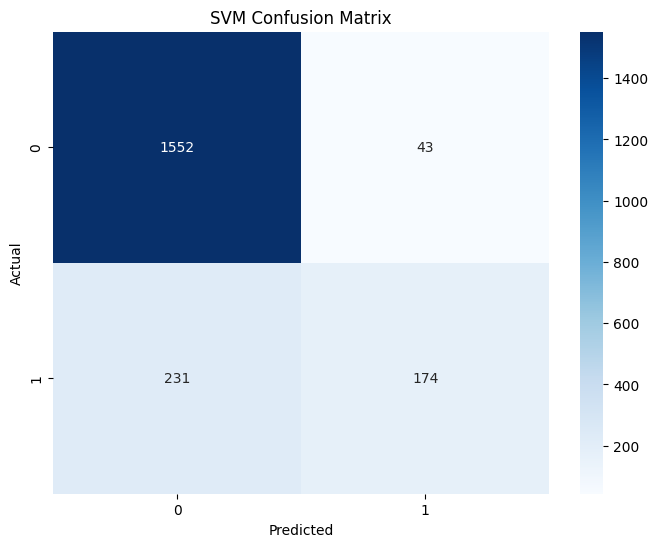

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1595
           1       0.80      0.43      0.56       405

    accuracy                           0.86      2000
   macro avg       0.84      0.70      0.74      2000
weighted avg       0.86      0.86      0.85      2000

ROC AUC:  0.7013351909903635


In [ ]:
#SVM
svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
svc_acc = accuracy_score(y_test, y_pred)
print("SVM Accuracy: ", svc_acc)

#SVM confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("SVM Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print(classification_report(y_test, y_pred))
print("ROC AUC: ", roc_auc_score(y_test, y_pred))


Random Forest Accuracy:  0.865


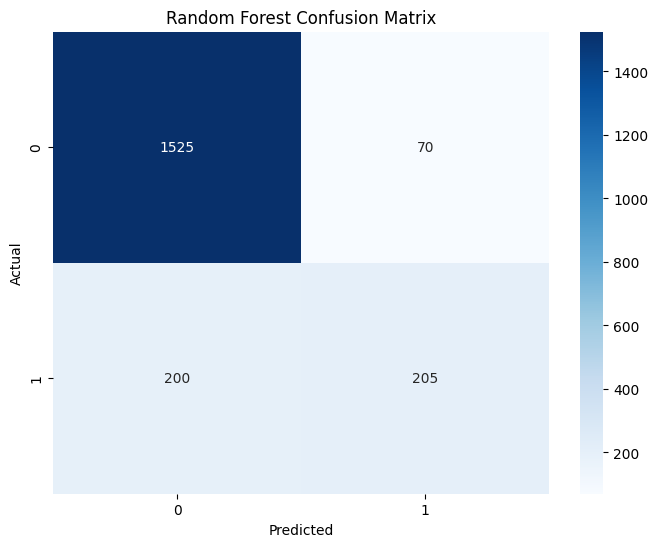

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1595
           1       0.75      0.51      0.60       405

    accuracy                           0.86      2000
   macro avg       0.81      0.73      0.76      2000
weighted avg       0.86      0.86      0.85      2000

ROC AUC:  0.7311428460853748


In [ ]:
#Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
rf_acc = accuracy_score(y_test, y_pred)
print("Random Forest Accuracy: ", rf_acc)

#Random Forest confusion matrix


cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print(classification_report(y_test, y_pred))
print("ROC AUC: ", roc_auc_score(y_test, y_pred))

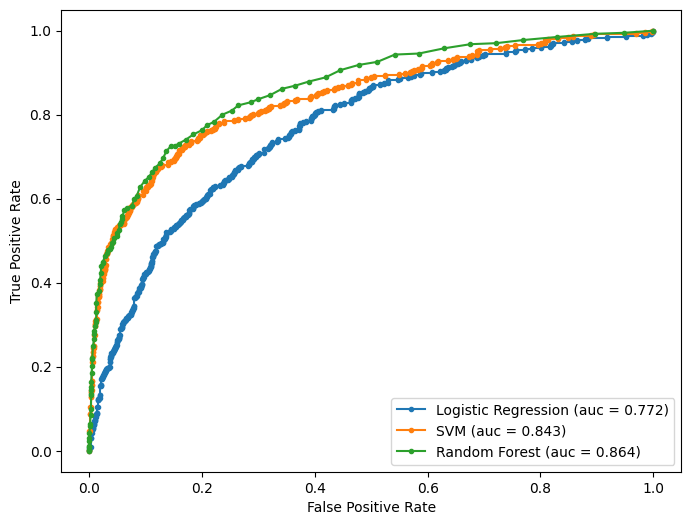

In [ ]:
from sklearn.metrics import roc_curve, auc
#Generating ROC curve for all models together
log_reg_probs = log_reg.predict_proba(X_test)[:, 1]
svc_probs = svc.decision_function(X_test)
rf_probs = rf.predict_proba(X_test)[:, 1]

log_reg_fpr, log_reg_tpr, _ = roc_curve(y_test, log_reg_probs)
svc_fpr, svc_tpr, _ = roc_curve(y_test, svc_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)

log_reg_auc = auc(log_reg_fpr, log_reg_tpr)
svc_auc = auc(svc_fpr, svc_tpr)
rf_auc = auc(rf_fpr, rf_tpr)

plt.figure(figsize=(8, 6))
plt.plot(log_reg_fpr, log_reg_tpr, marker='.', label='Logistic Regression (auc = %0.3f)' % log_reg_auc)
plt.plot(svc_fpr, svc_tpr, marker='.', label='SVM (auc = %0.3f)' % svc_auc)
plt.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest (auc = %0.3f)' % rf_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

#interpretation
#The Random Forest model is the best model for this dataset.

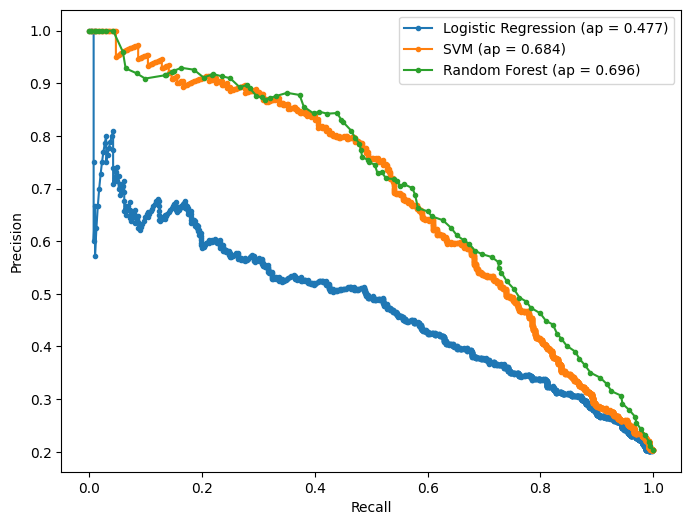

In [ ]:
#Precision Recall Curve for all three models
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

log_reg_precision, log_reg_recall, _ = precision_recall_curve(y_test, log_reg_probs)
svc_precision, svc_recall, _ = precision_recall_curve(y_test, svc_probs)
rf_precision, rf_recall, _ = precision_recall_curve(y_test, rf_probs)

log_reg_ap = average_precision_score(y_test, log_reg_probs)
svc_ap = average_precision_score(y_test, svc_probs)
rf_ap = average_precision_score(y_test, rf_probs)

plt.figure(figsize=(8, 6))
plt.plot(log_reg_recall, log_reg_precision, marker='.', label='Logistic Regression (ap = %0.3f)' % log_reg_ap)
plt.plot(svc_recall, svc_precision, marker='.', label='SVM (ap = %0.3f)' % svc_ap)
plt.plot(rf_recall, rf_precision, marker='.', label='Random Forest (ap = %0.3f)' % rf_ap)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()

#interpretation
#The Random Forest model has the highest AUC score which means it is the best model for this dataset.

In [ ]:
########OPTIONAL CODE FOR GRIDSEARCHCV########

In [ ]:
#Apply GridSearchCV to find the best hyperparameters for your models
from sklearn.model_selection import GridSearchCV

#Logistic Regression
log_reg = LogisticRegression()
params = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
log_reg_cv = GridSearchCV(log_reg, param_grid=params, cv=5)
log_reg_cv.fit(X_train, y_train)
print("Logistic Regression Best Parameters: ", log_reg_cv.best_params_)
print("Logistic Regression Best Score: ", log_reg_cv.best_score_)
y_pred = log_reg_cv.predict(X_test)
log_reg_acc = accuracy_score(y_test, y_pred)
print("Logistic Regression Accuracy: ", log_reg_acc)


Logistic Regression Best Parameters:  {'C': 0.01}
Logistic Regression Best Score:  0.81175
Logistic Regression Accuracy:  0.81


In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
#svm
svc = SVC()
params = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}
svc_cv = GridSearchCV(svc, param_grid=params, cv=5)
svc_cv.fit(X_train, y_train)
print("SVM Best Parameters: ", svc_cv.best_params_)
print("SVM Best Score: ", svc_cv.best_score_)
y_pred = svc_cv.predict(X_test)
svc_acc = accuracy_score(y_test, y_pred)
print("SVM Accuracy: ", svc_acc)

In [ ]:
#random forest
rf = RandomForestClassifier()
params = {'n_estimators': [50, 100, 200, 300], 'max_depth': [10, 20, 30, 40, 50]}
rf_cv = GridSearchCV(rf, param_grid=params, cv=5)
rf_cv.fit(X_train, y_train)
print("Random Forest Best Parameters: ", rf_cv.best_params_)
print("Random Forest Best Score: ", rf_cv.best_score_)
y_pred = rf_cv.predict(X_test)
rf_acc = accuracy_score(y_test, y_pred)
print("Random Forest Accuracy: ", rf_acc)